In [1]:
%load_ext autoreload
%autoreload 2

## Imports

## Data

Simple interface to generate all the data setup described in the overleaf

In [2]:
%run dev.py

/home/vivc/Code/memory-theory/factorization/dev.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_divisors = [torch.tensor(p) for p in self.input_divisors]


In [3]:
all_probas

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]])]

## Model

To keep it simple, I take a MLP architecture that resembles a transformer without attention.

In [5]:
from factorization.models.mlp import ModelConfig, Model

In [6]:
config = ModelConfig(
    input_size=input_size,
    output_size=output_size,
    emb_dim=32,
    ffn_dim=64,
    nb_layers=2,
)

model = Model(config)

## training

In [7]:
n_epochs = 1000
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

losses = torch.empty(n_epochs)

inputs = torch.arange(input_size).to(int)
outputs = deterministic_sampler.generate_targets(inputs)

# min_loss = F.cross_entropy(torch.log(targets), targets).item()
min_loss = 0

model.to(device)
inputs = inputs.to(device)
targets = outputs.to(device)

for epoch in range(n_epochs):
    # training

    logits = model(inputs)
    loss = F.cross_entropy(logits, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses[epoch] = loss.item() - min_loss

[]

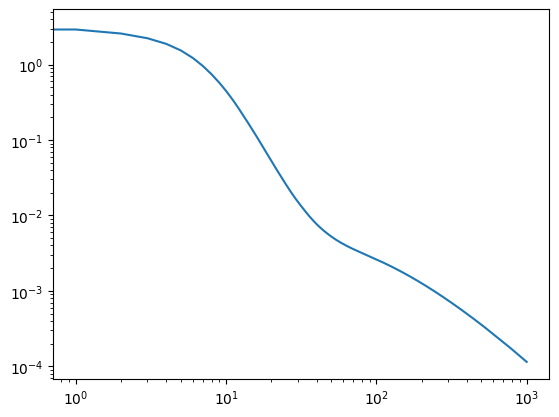

In [8]:
plt.plot(losses)
plt.loglog()